---
딥러닝 과제 1

IT 공학과 2214224 서지은

In [1]:
import torch
print(torch.__version__)

2.2.1+cu121


In [2]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 8

---
# 실습과제 1

## Multiply를 Addition으로 변경한 코드

In [3]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

y = c.view(-1, 1, 1) + x

print('\nAddition x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Addition x by a set of constants:
tensor([[[  2,   3,   4],
         [  5,   6,   7]],

        [[ 11,  12,  13],
         [ 14,  15,  16]],

        [[ 12,  13,  14],
         [ 15,  16,  17]],

        [[101, 102, 103],
         [104, 105, 106]]])


In [4]:
x.shape

torch.Size([2, 3])

In [5]:
c.view(-1,1,1).shape

torch.Size([4, 1, 1])

In [6]:
y.shape

torch.Size([4, 2, 3])

---
# 실습 과제 2

## L1 regularization

In [7]:
# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.relu(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

criterion = nn.MSELoss()

L2 Regularization function

In [8]:
def train_model_with_l2_regularization(
    model,
    criterion,
    optimizer,
    x, y, epochs=2000,
    weight_decay=0.01):


    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L2 Regularization is automatically applied through optimizer's weight_decay parameter
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

L1 Regularization function

In [9]:
def train_model_with_l1_regularization(
    model,
    criterion,
    optimizer,
    x, y, epochs=2000,
    l1_lambda=0.01):

    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L1 Regularization
        l1_reg = 0
        for param in model.parameters():
            l1_reg += torch.sum(torch.abs(param))

        loss += l1_lambda * l1_reg

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [10]:
# Model without regularization
model_no_reg = NetWithActivations(hidden_size=50)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=0.01)
print('|======================================|')
print('case1 : model without regularization\n')
train_model_with_l2_regularization(model_no_reg, criterion, optimizer_no_reg, x, y, epochs=2000, weight_decay=0)

# Model with L2 regularization
model_with_l2_reg = NetWithActivations(hidden_size=50)
optimizer_with_l2_reg = torch.optim.Adam(model_with_l2_reg.parameters(), lr=0.01, weight_decay=0.01)  # Including L2 regularization
print('\n|======================================|')
print('case2 : model with L2 regularization\n')
train_model_with_l2_regularization(model_with_l2_reg, criterion, optimizer_with_l2_reg, x, y, epochs=2000, weight_decay=0.01)

# Model with L1 regularization
model_with_l1_reg = NetWithActivations(hidden_size=50)
optimizer_with_l1_reg = torch.optim.Adam(model_with_l1_reg.parameters(), lr=0.01, weight_decay=0)
print('\n|======================================|')
print('case3 : model with L1 regularization\n')
train_model_with_l1_regularization(model_with_l1_reg, criterion, optimizer_with_l1_reg, x, y, epochs=2000, l1_lambda=0.01)


|======================================|
case1 : model without regularization

Epoch [100/2000], Loss: 0.0012
Epoch [200/2000], Loss: 0.0001
Epoch [300/2000], Loss: 0.0000
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0006
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0001

|======================================|
case2 : model with L2 regularization

Epoch [100/2000], Loss: 0.0114
Epoch [200/2000], Loss: 0.0092
Epoch [300/2000], Loss: 0.0086
Epoch [400/2000], Loss: 0.0086
Epoch [500/2000], Loss: 0.0086
Epoch [600/2000], Loss: 0.0086
Epoch [700/2000], Loss: 

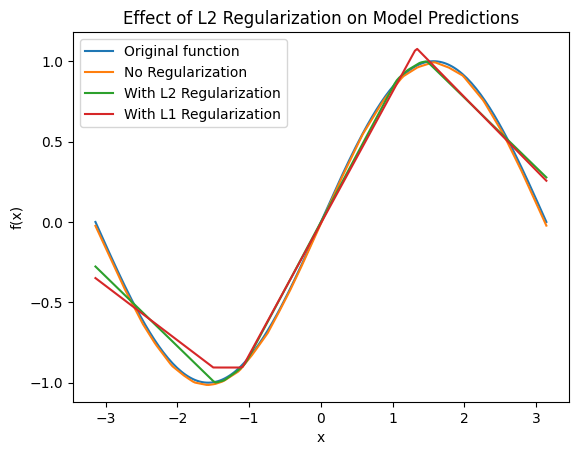

In [11]:
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_with_l2_reg = model_with_l2_reg(x).detach().numpy()
    predictions_with_l1_reg = model_with_l1_reg(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_with_l2_reg, label='With L2 Regularization')
plt.plot(x.numpy(), predictions_with_l1_reg, label='With L1 Regularization')
plt.legend()
plt.title('Effect of L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


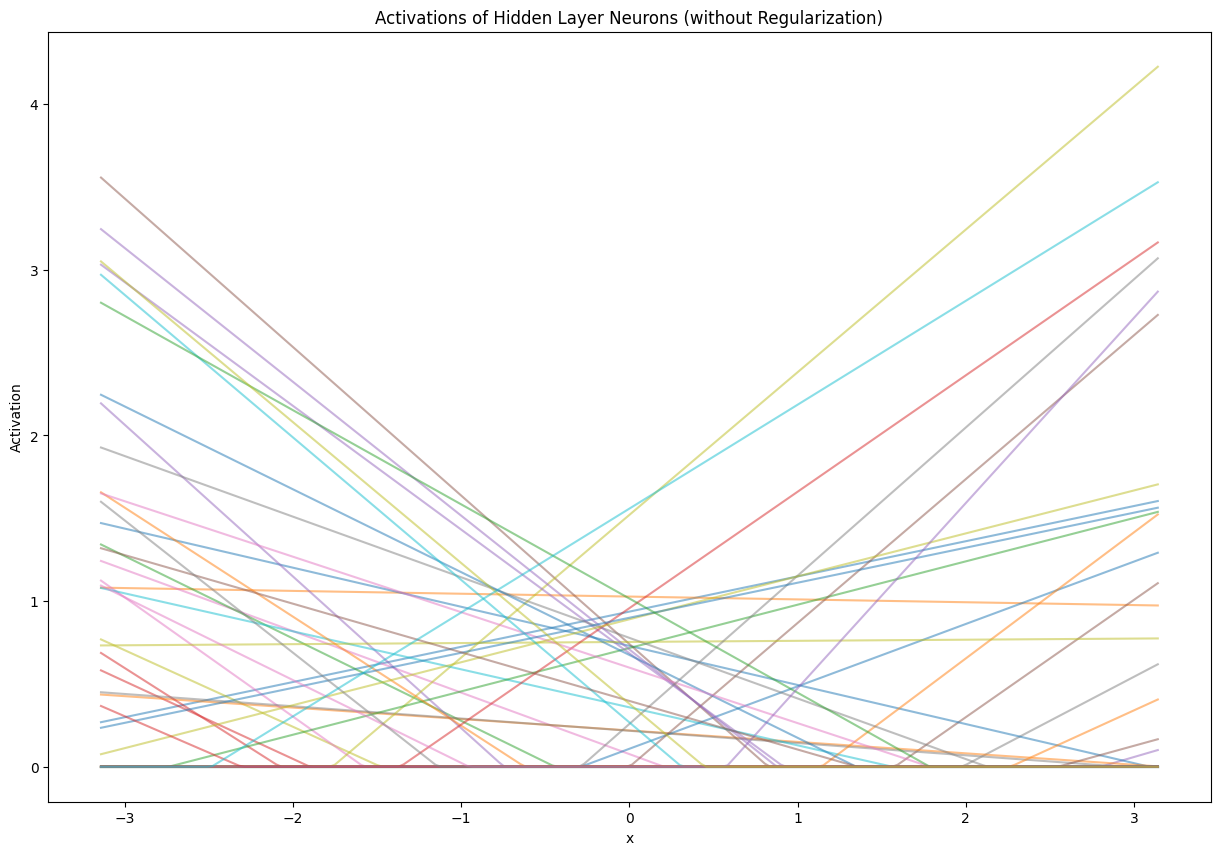

In [12]:

with torch.no_grad():
    _, activations = model_no_reg.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons (without Regularization)')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()

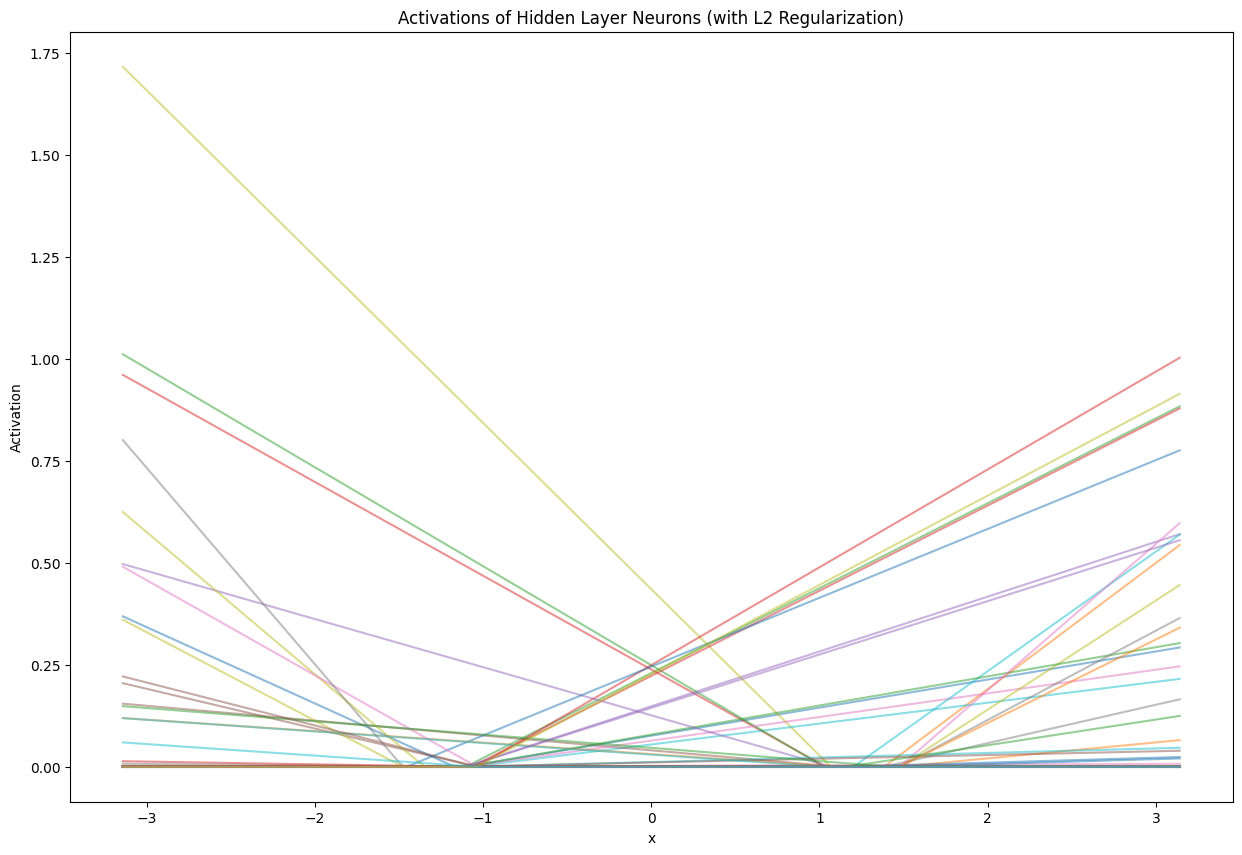

In [13]:

with torch.no_grad():
    _, activations = model_with_l2_reg.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons (with L2 Regularization)')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()


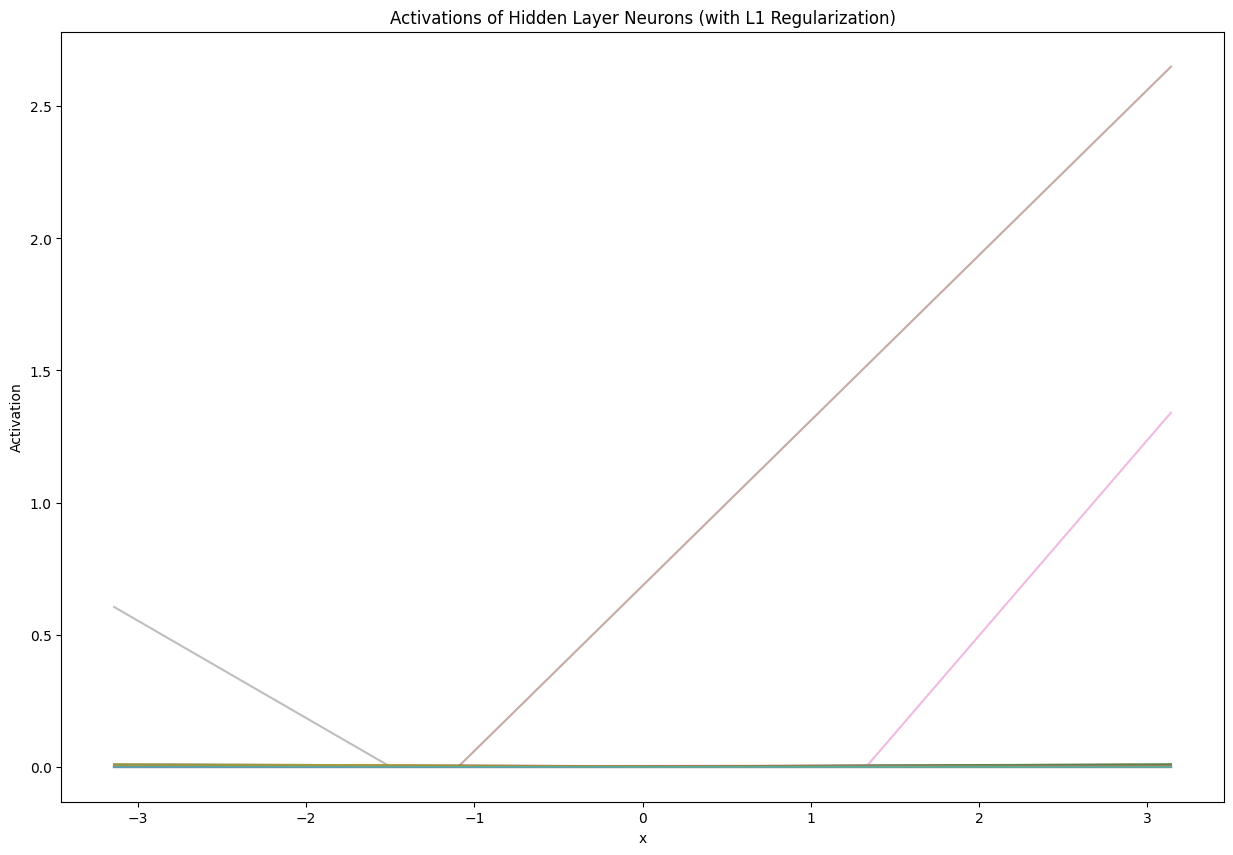

In [14]:

with torch.no_grad():
    _, activations = model_with_l1_reg.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons (with L1 Regularization)')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()


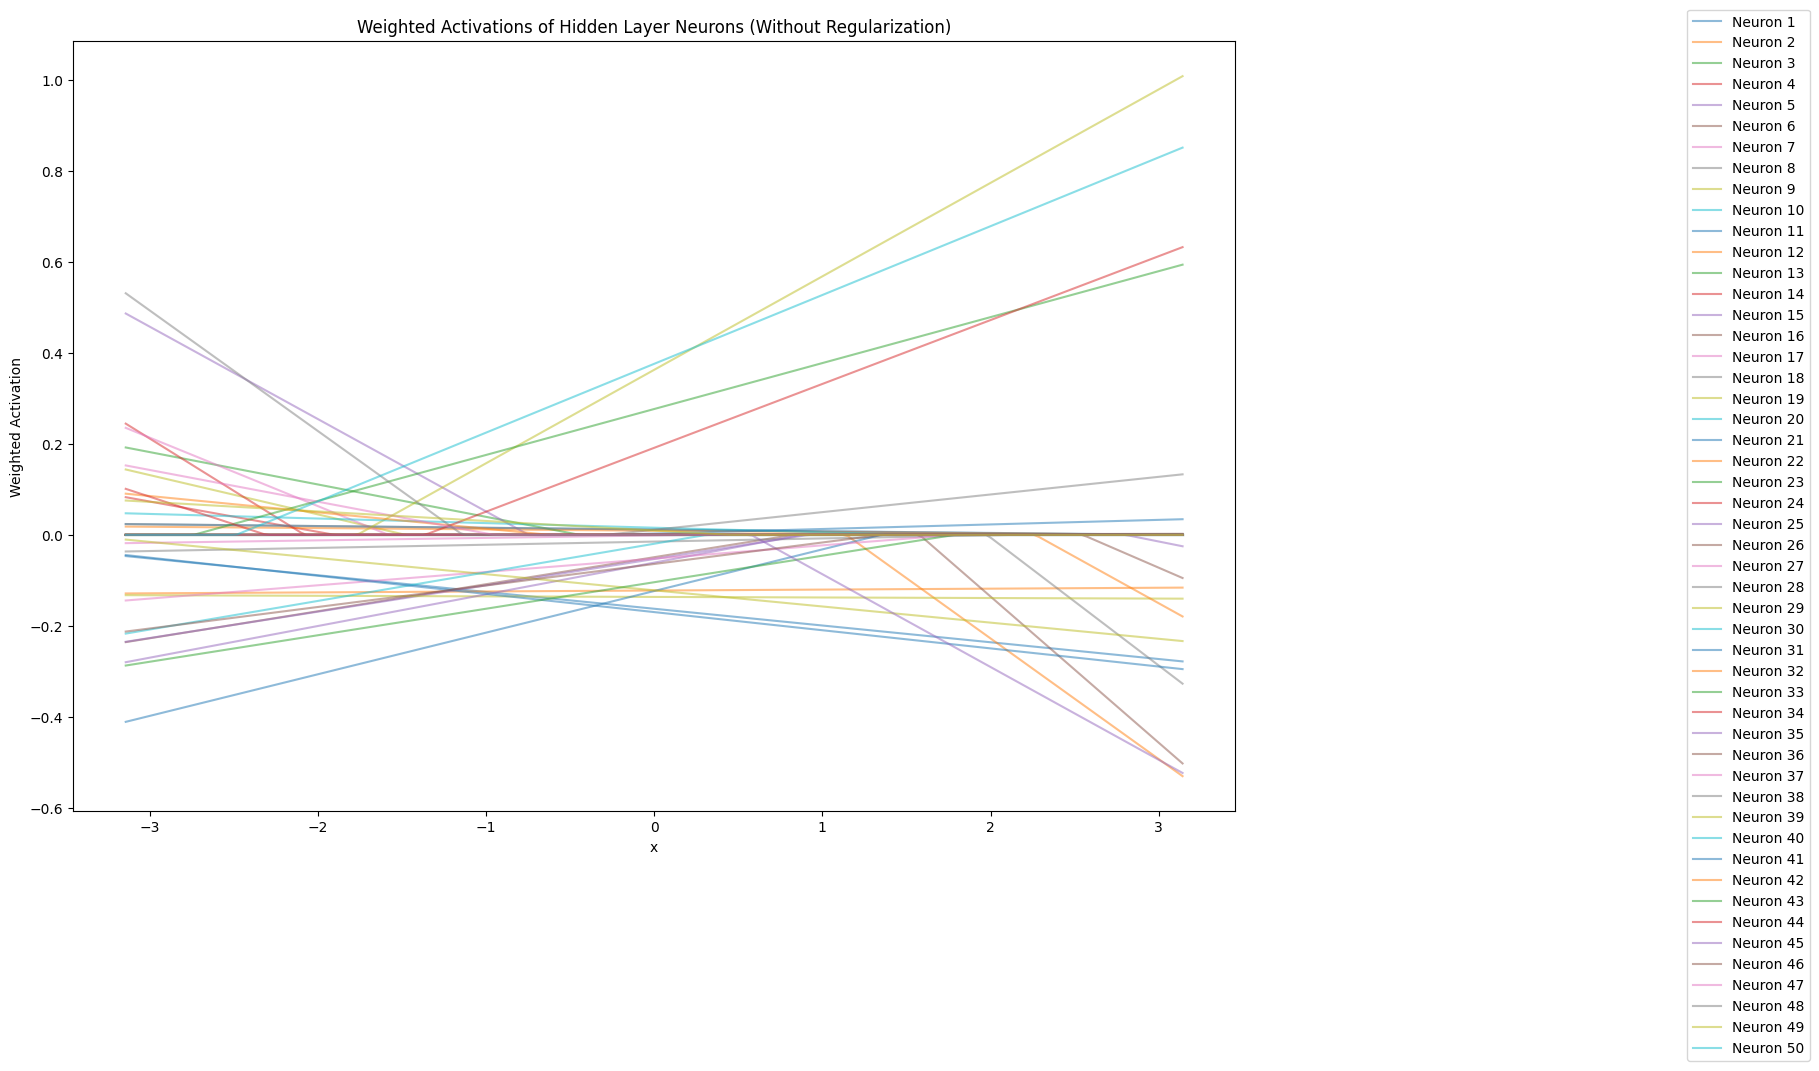

In [15]:
with torch.no_grad():
    _, activations_no_reg = model_no_reg.forward_with_activations(x)
weights_to_output_no_reg = model_no_reg.fc2.weight.detach()

# Compute weighted activations for the regularized model
weighted_activations_no_reg = activations_no_reg * weights_to_output_no_reg.T.view(-1)

plt.figure(figsize=(15, 10))
for i in range(weighted_activations_no_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_no_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')

plt.title('Weighted Activations of Hidden Layer Neurons (Without Regularization)')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.show()


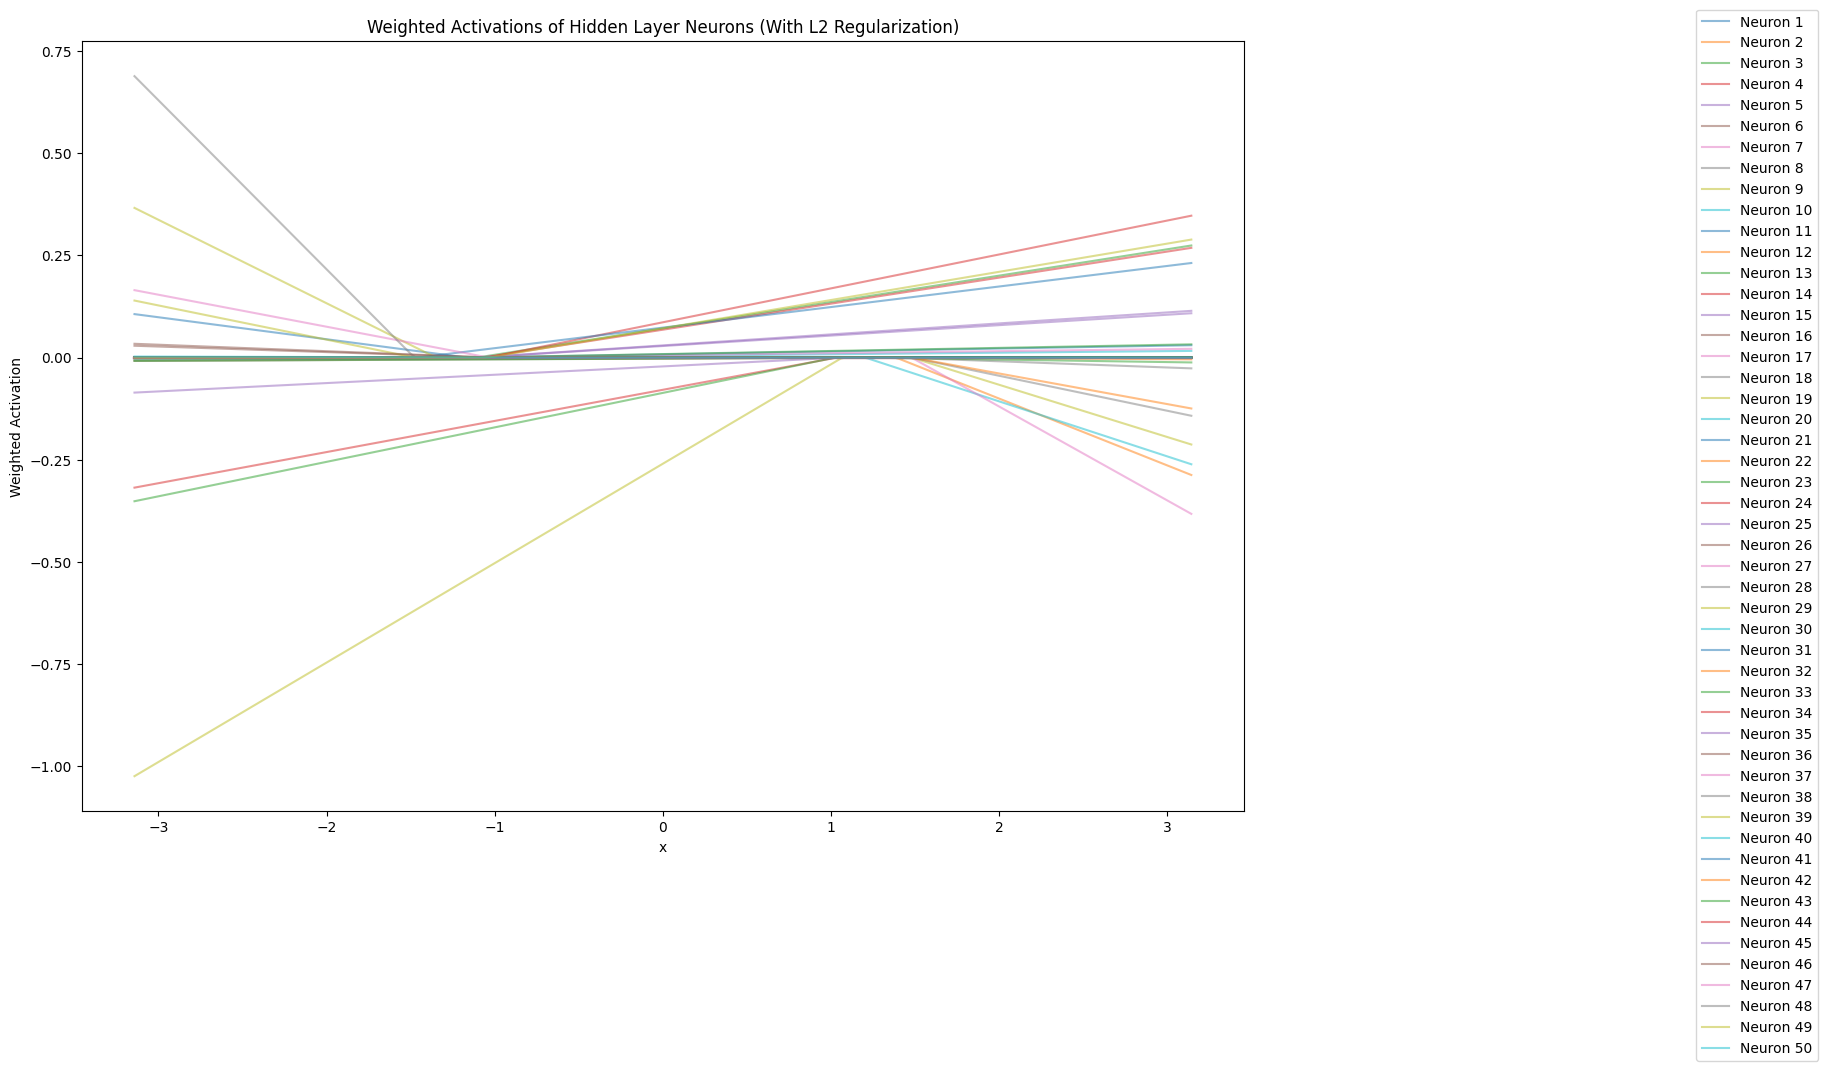

In [16]:
with torch.no_grad():
    _, activations_with_l2_reg = model_with_l2_reg.forward_with_activations(x)
weights_to_output_l2_reg = model_with_l2_reg.fc2.weight.detach()

# Compute weighted activations for the regularized model
weighted_activations_with_l2_reg = activations_with_l2_reg * weights_to_output_l2_reg.T.view(-1)

plt.figure(figsize=(15, 10))
for i in range(weighted_activations_with_l2_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_l2_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')

plt.title('Weighted Activations of Hidden Layer Neurons (With L2 Regularization)')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.show()


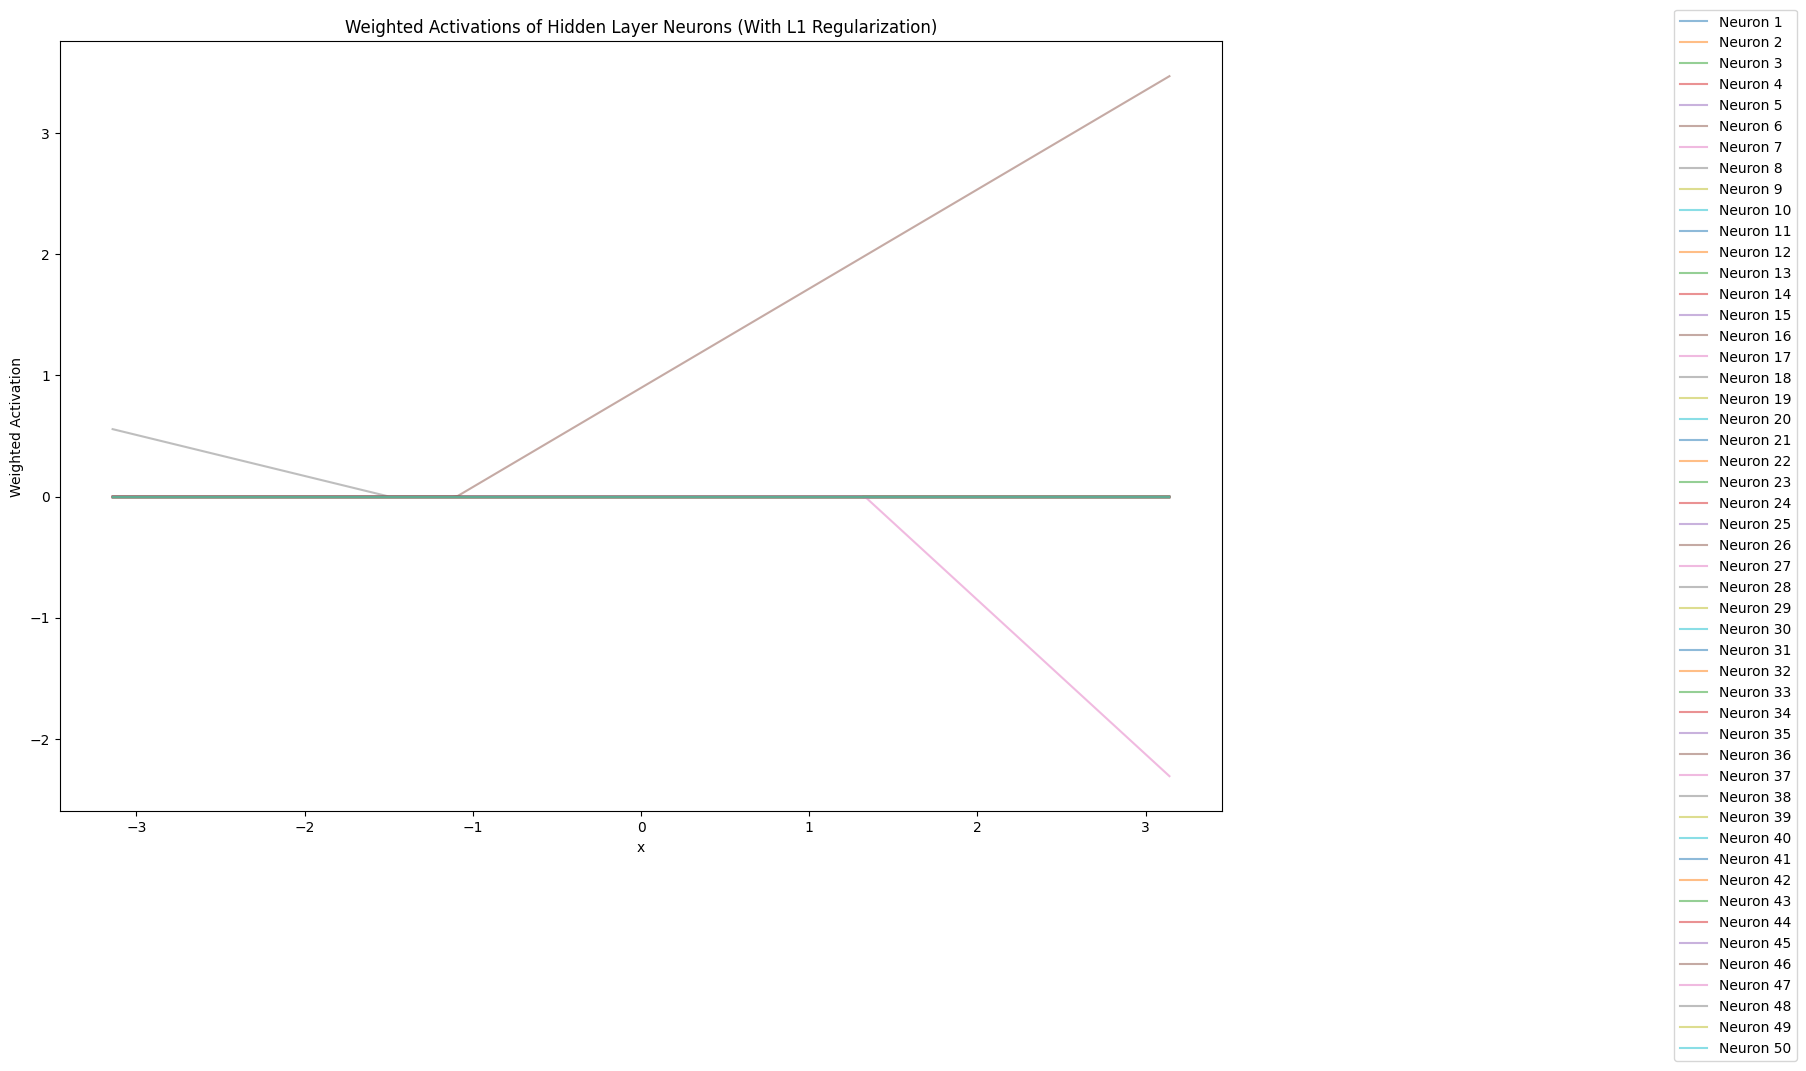

In [17]:
with torch.no_grad():
    _, activations_with_l1_reg = model_with_l1_reg.forward_with_activations(x)
weights_to_output_l1_reg = model_with_l1_reg.fc2.weight.detach()

# Compute weighted activations for the regularized model
weighted_activations_with_l1_reg = activations_with_l1_reg * weights_to_output_l1_reg.T.view(-1)

plt.figure(figsize=(15, 10))
for i in range(weighted_activations_with_l1_reg.size(1)):
    plt.plot(x.numpy(), weighted_activations_with_l1_reg[:, i].detach().numpy(), alpha=0.5, label=f'Neuron {i+1}')

plt.title('Weighted Activations of Hidden Layer Neurons (With L1 Regularization)')
plt.xlabel('x')
plt.ylabel('Weighted Activation')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.05))
plt.show()


---
# 실습 과제 3

ReLU를 사용하는 기존 코드

Epoch [100/2000], Train Loss: 0.0043
Epoch [200/2000], Train Loss: 0.0005
Epoch [300/2000], Train Loss: 0.0002
Epoch [400/2000], Train Loss: 0.0001
Epoch [500/2000], Train Loss: 0.0000
Epoch [600/2000], Train Loss: 0.0000
Epoch [700/2000], Train Loss: 0.0000
Epoch [800/2000], Train Loss: 0.0000
Epoch [900/2000], Train Loss: 0.0000
Epoch [1000/2000], Train Loss: 0.0000
Epoch [1100/2000], Train Loss: 0.0000
Epoch [1200/2000], Train Loss: 0.0000
Epoch [1300/2000], Train Loss: 0.0000
Epoch [1400/2000], Train Loss: 0.0000
Epoch [1500/2000], Train Loss: 0.0000
Epoch [1600/2000], Train Loss: 0.0001
Epoch [1700/2000], Train Loss: 0.0000
Epoch [1800/2000], Train Loss: 0.0000
Epoch [1900/2000], Train Loss: 0.0006
Epoch [2000/2000], Train Loss: 0.0000


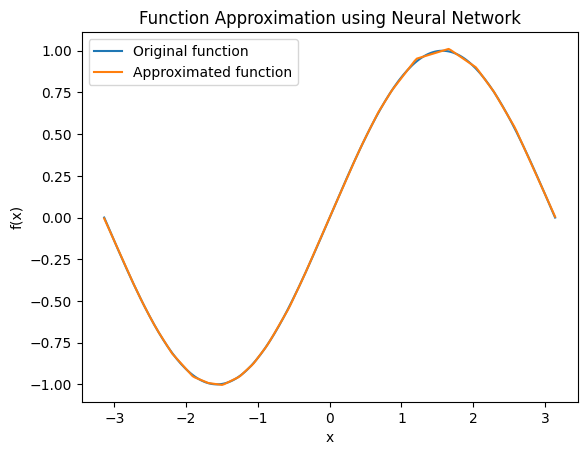

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Neural network definition
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model instantiation
model = Net(hidden_size=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}')

# Results visualization
with torch.no_grad():
    predicted = model(x).detach().numpy()

# Original vs Approximated function plot
plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predicted, label='Approximated function')
plt.legend()
plt.title('Function Approximation using Neural Network')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


SiLU와 Mish

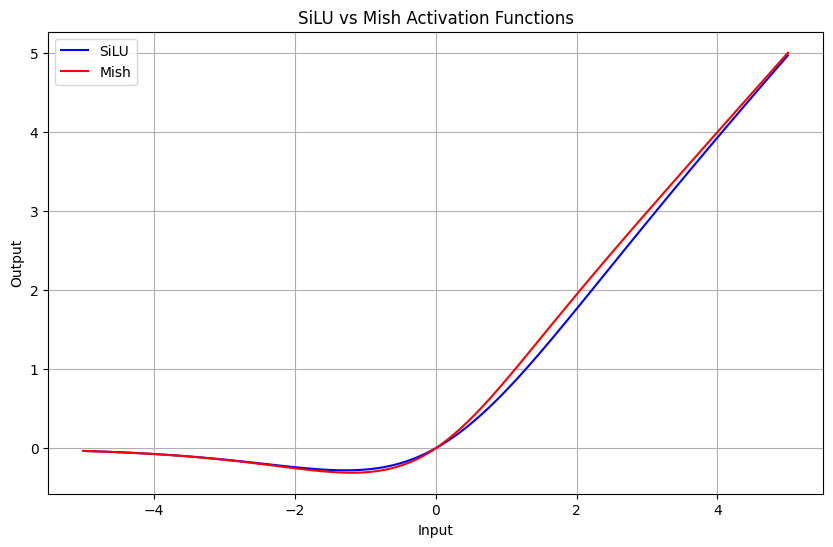

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def silu(x):
    return x * (1 / (1 + np.exp(-x)))

def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

# 입력 데이터 생성
x = np.linspace(-5, 5, 100)

# silu와 mish 함수를 사용하여 y 값 계산
y_silu = silu(x)
y_mish = mish(x)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y_silu, label='SiLU', color='blue')
plt.plot(x, y_mish, label='Mish', color='red')
plt.title('SiLU vs Mish Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


## SiLU를 사용하는 코드

Epoch [100/2000], Train Loss: 0.0253
Epoch [200/2000], Train Loss: 0.0006
Epoch [300/2000], Train Loss: 0.0002
Epoch [400/2000], Train Loss: 0.0001
Epoch [500/2000], Train Loss: 0.0000
Epoch [600/2000], Train Loss: 0.0000
Epoch [700/2000], Train Loss: 0.0000
Epoch [800/2000], Train Loss: 0.0000
Epoch [900/2000], Train Loss: 0.0000
Epoch [1000/2000], Train Loss: 0.0000
Epoch [1100/2000], Train Loss: 0.0000
Epoch [1200/2000], Train Loss: 0.0000
Epoch [1300/2000], Train Loss: 0.0000
Epoch [1400/2000], Train Loss: 0.0000
Epoch [1500/2000], Train Loss: 0.0000
Epoch [1600/2000], Train Loss: 0.0000
Epoch [1700/2000], Train Loss: 0.0000
Epoch [1800/2000], Train Loss: 0.0000
Epoch [1900/2000], Train Loss: 0.0000
Epoch [2000/2000], Train Loss: 0.0000


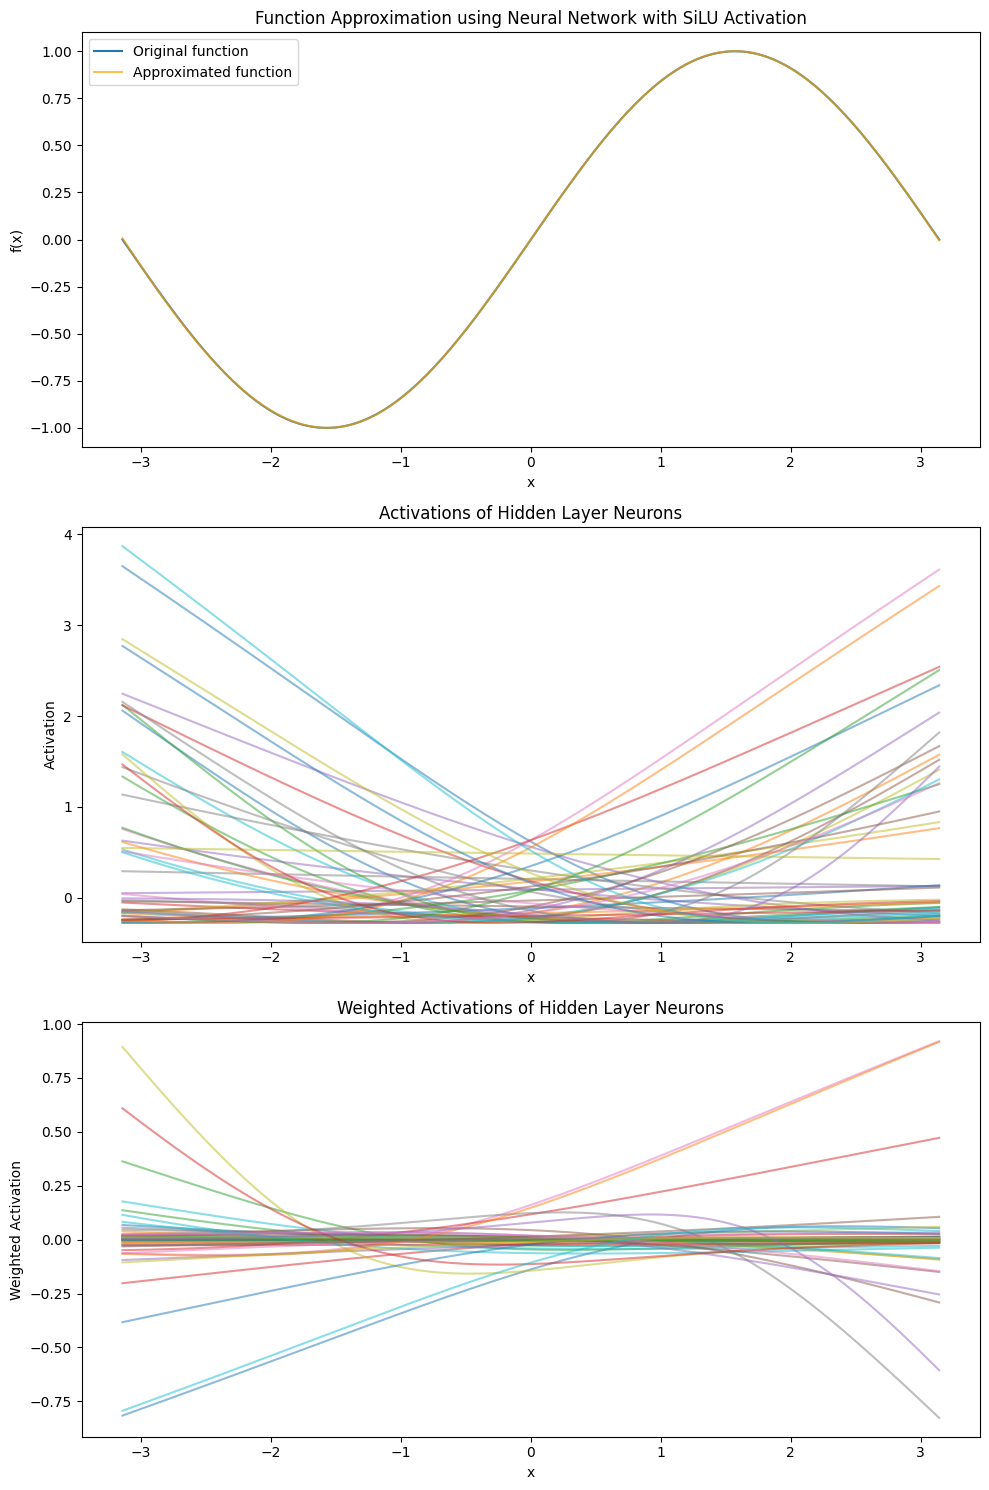

In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

# Neural network definition
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.silu = nn.SiLU()  # SiLU 활성화 함수 추가

    def forward(self, x):
        x = self.silu(self.fc1(x))  # SiLU 활성화 함수로 변경
        x = self.fc2(x)
        return x

class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = self.silu(self.fc1(x))  # SiLU 활성화 함수 적용
        output = self.fc2(activations)
        return output, activations


# Model instantiation
model = Net(hidden_size=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}')

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

# Results visualization
with torch.no_grad():
    predicted = model(x).detach().numpy()
    _, activations = model_with_activations.forward_with_activations(x)

# Get the weights from the hidden layer to the output
weights_to_output = model_with_activations.fc2.weight.detach()

# Compute weighted activations
weighted_activations = activations * weights_to_output


# Original vs Approximated function plot
plt.figure(figsize=(10, 15))

# Plot Original vs Approximated function
plt.subplot(3, 1, 1)
plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predicted, color='orange', alpha=0.7, label='Approximated function')
plt.legend()
plt.title('Function Approximation using Neural Network with SiLU Activation')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot Activations of Hidden Layer Neurons
plt.subplot(3, 1, 2)
for i in range(activations.size(1)):
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)
plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')

plt.subplot(3, 1, 3)
for i in range(weighted_activations.size(1)):
    plt.plot(x.numpy(), weighted_activations[:, i].numpy(), alpha=0.5)

plt.title('Weighted Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Weighted Activation')


plt.tight_layout()
plt.show()



## MISH를 사용하는 코드

Epoch [100/2000], Train Loss: 0.0020
Epoch [200/2000], Train Loss: 0.0006
Epoch [300/2000], Train Loss: 0.0002
Epoch [400/2000], Train Loss: 0.0000
Epoch [500/2000], Train Loss: 0.0000
Epoch [600/2000], Train Loss: 0.0000
Epoch [700/2000], Train Loss: 0.0000
Epoch [800/2000], Train Loss: 0.0000
Epoch [900/2000], Train Loss: 0.0001
Epoch [1000/2000], Train Loss: 0.0000
Epoch [1100/2000], Train Loss: 0.0000
Epoch [1200/2000], Train Loss: 0.0000
Epoch [1300/2000], Train Loss: 0.0000
Epoch [1400/2000], Train Loss: 0.0000
Epoch [1500/2000], Train Loss: 0.0000
Epoch [1600/2000], Train Loss: 0.0000
Epoch [1700/2000], Train Loss: 0.0000
Epoch [1800/2000], Train Loss: 0.0028
Epoch [1900/2000], Train Loss: 0.0000
Epoch [2000/2000], Train Loss: 0.0000


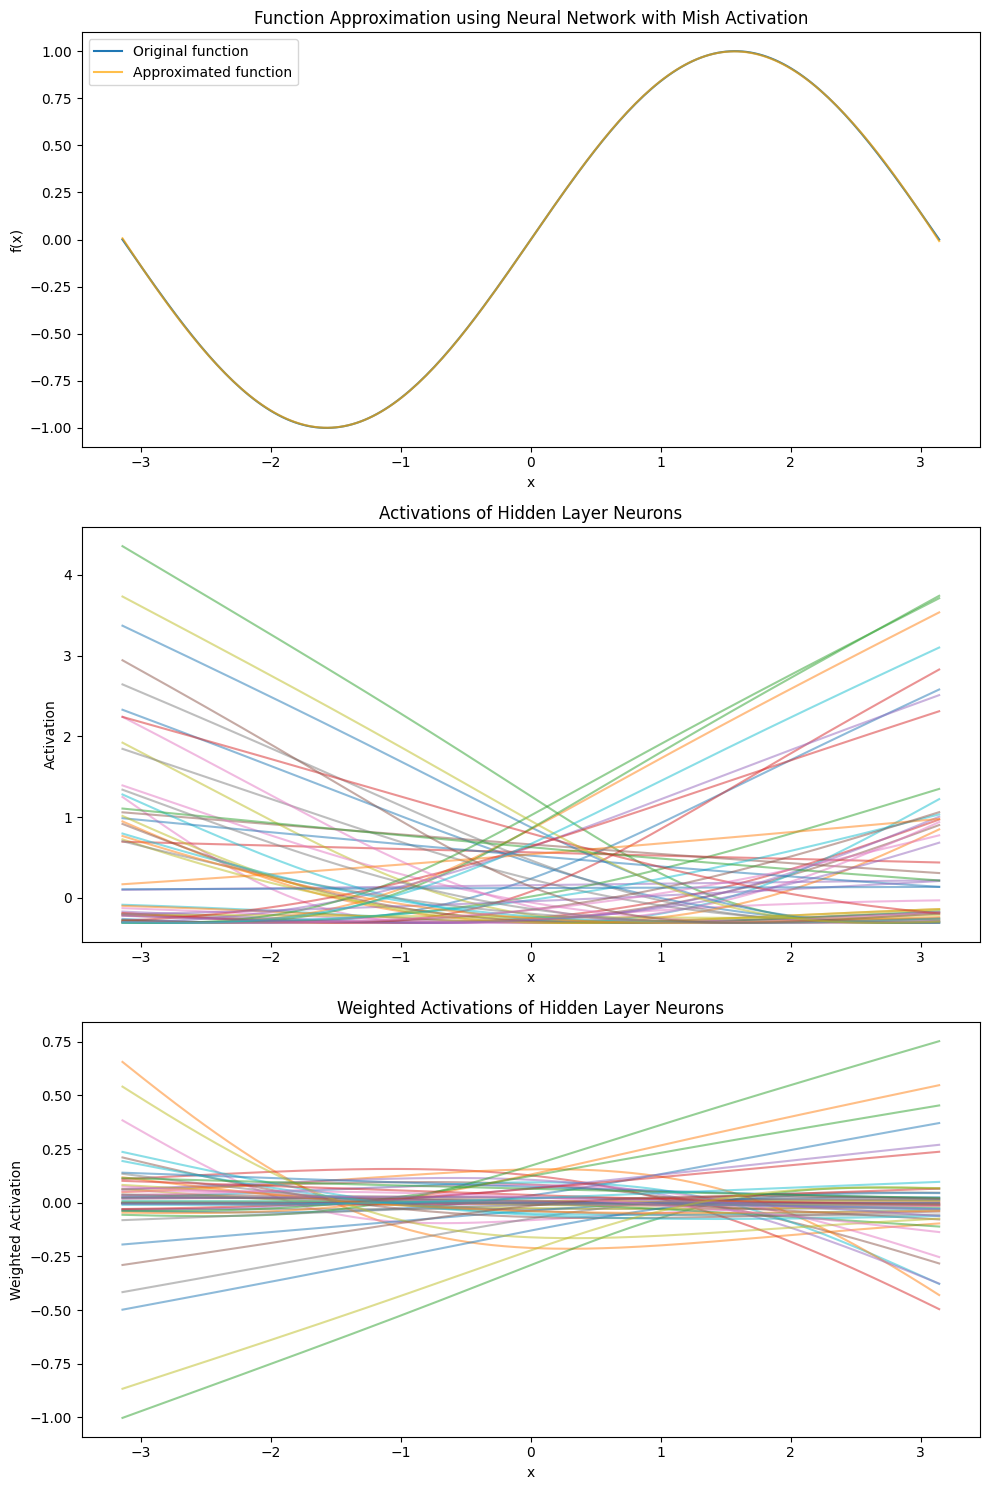

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)
y = torch.sin(x)

class Mish(nn.Module):
    def __init__(self):
        super(Mish, self).__init__()

    def forward(self, x):
        return x * torch.tanh(F.softplus(x))


# Neural network definition
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.mish = Mish()  # 사용자 정의 Mish 함수를 모델 내부에 저장

    def forward(self, x):
        x = self.mish(self.fc1(x))
        x = self.fc2(x)
        return x

class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = self.mish(self.fc1(x))
        output = self.fc2(activations)
        return output, activations


# Model instantiation
model = Net(hidden_size=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}')

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

# Results visualization
with torch.no_grad():
    predicted = model(x).detach().numpy()
    _, activations = model_with_activations.forward_with_activations(x)

# Get the weights from the hidden layer to the output
weights_to_output = model_with_activations.fc2.weight.detach()

# Compute weighted activations
weighted_activations = activations * weights_to_output


# Original vs Approximated function plot
plt.figure(figsize=(10, 15))

# Plot Original vs Approximated function
plt.subplot(3, 1, 1)
plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predicted, color='orange', alpha=0.7, label='Approximated function')
plt.legend()
plt.title('Function Approximation using Neural Network with Mish Activation')
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot Activations of Hidden Layer Neurons
plt.subplot(3, 1, 2)
for i in range(activations.size(1)):
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)
plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')

plt.subplot(3, 1, 3)
for i in range(weighted_activations.size(1)):
    plt.plot(x.numpy(), weighted_activations[:, i].numpy(), alpha=0.5)

plt.title('Weighted Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Weighted Activation')


plt.tight_layout()
plt.show()



---
# 실습 과제 4

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

# Train and Evaluate the Model Function
def train_and_evaluate_model(model, loss_fn, optimizer, train_loader, test_loader):
    # Training loop
    model.train()
    for epoch in range(10):  # Run for 10 epochs
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    # Evaluation loop
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Accuracy: {accuracy}%')

## 사용자 정의 Hinge Loss

In [46]:
class MultiClassHingeLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(MultiClassHingeLoss, self).__init__()
        self.margin = margin

    def forward(self, output, target):
        """
        Args:
            output (Tensor): Predictions from the model (batch_size x num_classes).
            target (Tensor): True labels (batch_size).
        """
        # Number of classes
        num_classes = output.size(1)

        # Create a mask to ignore the contribution of the correct class
        correct_indices = target.unsqueeze(1).long()
        correct_scores = output.gather(1, correct_indices).expand_as(output)

        # Calculate the margin loss
        margin_loss = output - correct_scores + self.margin

        # Zero the loss for the correct class
        margin_loss.scatter_(1, correct_indices, 0)

        # ReLU activation (max(0, x))
        relu_applied = torch.relu(margin_loss)

        # Sum over classes, and then average over batch
        loss = torch.sum(relu_applied) / output.size(0)
        return loss

# Using the custom SVM Loss for training
svm_loss_fn = MultiClassHingeLoss(margin=1.0)
model = MLP()  # Ensure you're using the same MLP class defined earlier
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_and_evaluate_model(model, svm_loss_fn, optimizer, train_loader, test_loader)


Epoch 1, Loss: 0.4007132053375244
Epoch 2, Loss: 0.09301576763391495
Epoch 3, Loss: 0.181894451379776
Epoch 4, Loss: 0.04748527705669403
Epoch 5, Loss: 0.0016531199216842651
Epoch 6, Loss: 0.036987900733947754
Epoch 7, Loss: 0.011978954076766968
Epoch 8, Loss: 0.024458810687065125
Epoch 9, Loss: 0.012099355459213257
Epoch 10, Loss: 0.021646469831466675
Accuracy: 97.8%


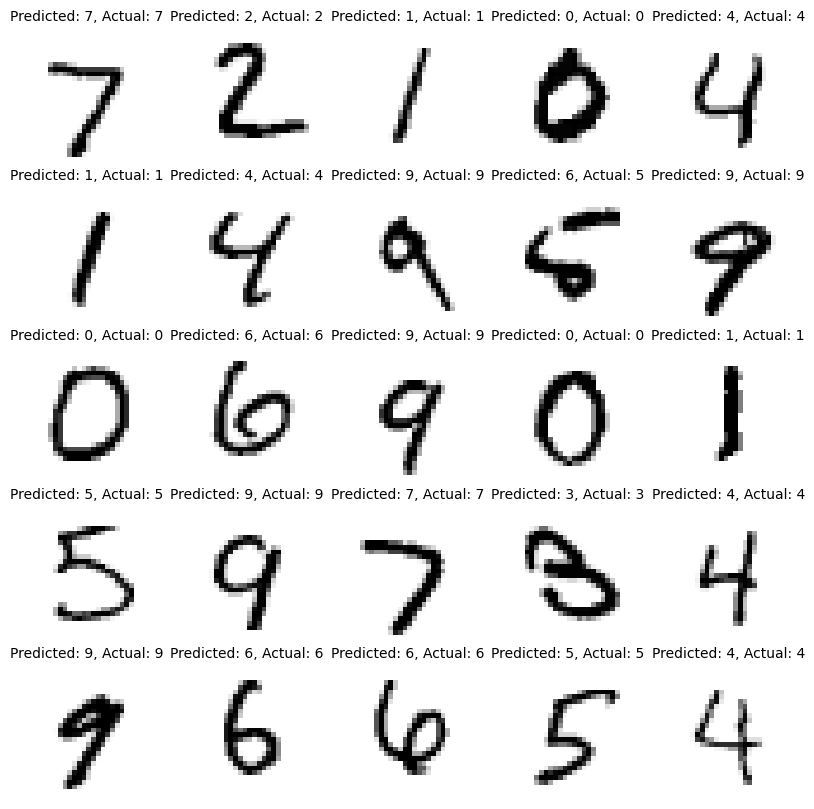

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Extract a batch of images and labels from the test dataset
images, labels = next(iter(test_loader))

# Make predictions on the batch of images
outputs = model(images)
predicted = torch.argmax(outputs, dim=1)

# Plot the images, predicted labels, and actual labels in a grid
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray_r')
    plt.axis('off')
    plt.title(f"Predicted: {predicted[i]}, Actual: {labels[i]}", fontsize=10)
plt.show()


## Hinge Loss

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

print("Training with Hinge Loss:")
model_hl = MLP()
optimizer = optim.SGD(model_hl.parameters(), lr=0.01, momentum=0.9)
hinge_loss = nn.MultiMarginLoss(p=1)
train_and_evaluate_model(model_hl, hinge_loss, optimizer, train_loader, test_loader)

Training with Hinge Loss:
Epoch 1, Loss: 0.027243152260780334
Epoch 2, Loss: 0.005275839939713478
Epoch 3, Loss: 0.008510323241353035
Epoch 4, Loss: 0.004545754287391901
Epoch 5, Loss: 0.0018770955502986908
Epoch 6, Loss: 0.014765702188014984
Epoch 7, Loss: 0.008138851262629032
Epoch 8, Loss: 0.02008516900241375
Epoch 9, Loss: 0.012631155550479889
Epoch 10, Loss: 0.00327454530633986
Accuracy: 97.51%


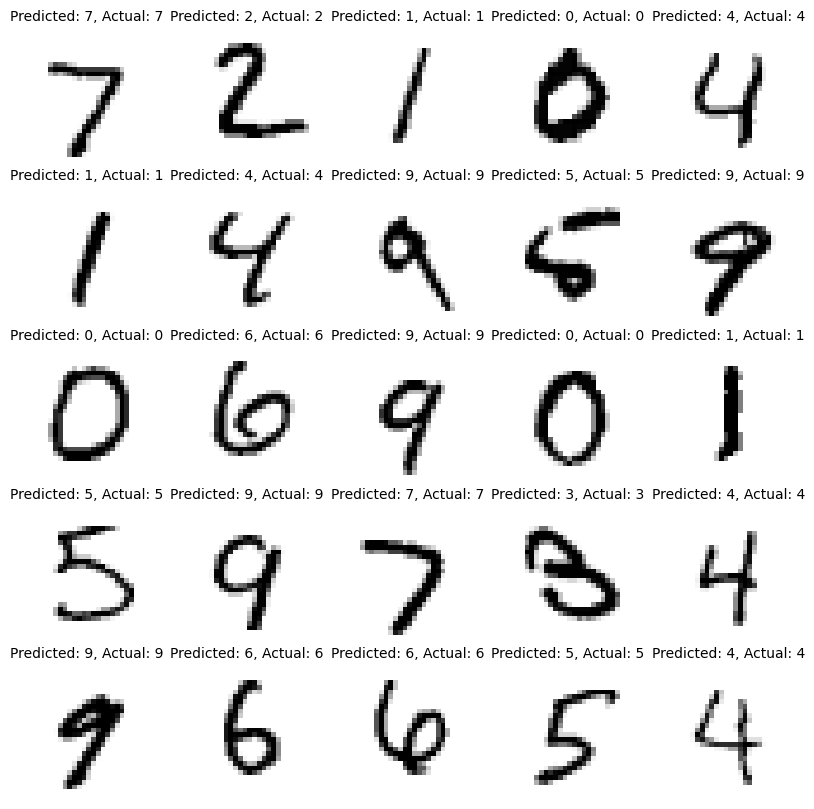

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Extract a batch of images and labels from the test dataset
images, labels = next(iter(test_loader))

# Make predictions on the batch of images
outputs = model_hl(images)
predicted = torch.argmax(outputs, dim=1)

# Plot the images, predicted labels, and actual labels in a grid
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray_r')
    plt.axis('off')
    plt.title(f"Predicted: {predicted[i]}, Actual: {labels[i]}", fontsize=10)
plt.show()


## Squared Hinge Loss

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


print("Training with Squared Hinge Loss:")
model_sh = MLP()
optimizer = optim.SGD(model_sh.parameters(), lr=0.01, momentum=0.9)
squared_hinge_loss = nn.MultiMarginLoss(p=2)
train_and_evaluate_model(model_sh, squared_hinge_loss, optimizer, train_loader, test_loader)

Training with Squared Hinge Loss:
Epoch 1, Loss: 0.020181234925985336
Epoch 2, Loss: 0.011232546530663967
Epoch 3, Loss: 0.00900657195597887
Epoch 4, Loss: 0.005749395117163658
Epoch 5, Loss: 0.0003483160980977118
Epoch 6, Loss: 0.02455558441579342
Epoch 7, Loss: 0.005790537688881159
Epoch 8, Loss: 0.002043022308498621
Epoch 9, Loss: 0.015395989641547203
Epoch 10, Loss: 0.003174473764374852
Accuracy: 97.82%


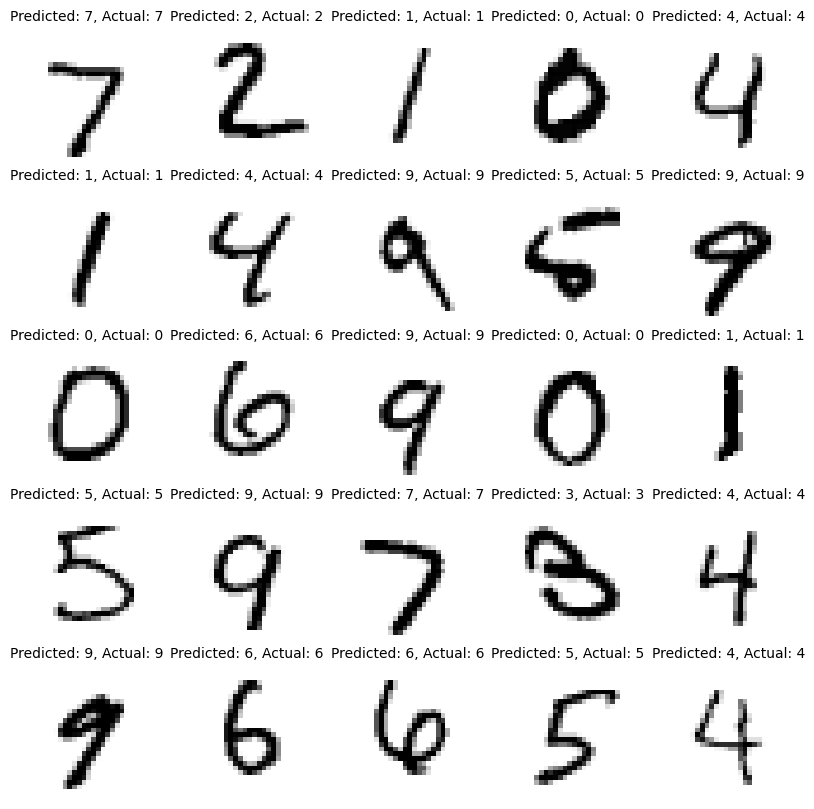

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Extract a batch of images and labels from the test dataset
images, labels = next(iter(test_loader))

# Make predictions on the batch of images
outputs = model_sh(images)
predicted = torch.argmax(outputs, dim=1)

# Plot the images, predicted labels, and actual labels in a grid
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray_r')
    plt.axis('off')
    plt.title(f"Predicted: {predicted[i]}, Actual: {labels[i]}", fontsize=10)
plt.show()


---
# 실습 과제 5

## MNIST barebone function

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the Model
class MNISTBarebone(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_size = 28*28
        self.hidden_size = 100
        self.output_size = 10

        # weight, bias
        self.weight1 = nn.Parameter(torch.Tensor(self.hidden_size, self.input_size))
        self.bias1 = nn.Parameter(torch.Tensor(self.hidden_size))
        self.weight2 = nn.Parameter(torch.Tensor(self.output_size, self.hidden_size))
        self.bias2 = nn.Parameter(torch.Tensor(self.output_size))

        # weight 초기화
        nn.init.kaiming_uniform_(self.weight1, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.weight2, nonlinearity='relu')

        # bias 초기화
        nn.init.constant_(self.bias1, 0)
        nn.init.constant_(self.bias2, 0)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(F.linear(x, self.weight1, self.bias1))
        x = F.relu(F.linear(x, self.weight2, self.bias2))

        return x

# Train and Evaluate the Model Function
def train_and_evaluate_model(model, loss_fn, optimizer, train_loader, test_loader):
    # Training loop
    model.train()
    for epoch in range(10):  # Run for 10 epochs
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = loss_fn(output, target)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    # Evaluation loop
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Accuracy: {accuracy}%')


model = MNISTBarebone()
model

MNISTBarebone()

In [30]:
# Training with Cross Entropy Loss
print("Training with Cross Entropy Loss:")
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
cross_entropy_loss = nn.CrossEntropyLoss()
train_and_evaluate_model(model, cross_entropy_loss, optimizer, train_loader, test_loader)

Training with Cross Entropy Loss:
Epoch 1, Loss: 0.249623104929924
Epoch 2, Loss: 0.09803672134876251
Epoch 3, Loss: 0.025728829205036163
Epoch 4, Loss: 0.007521972991526127
Epoch 5, Loss: 0.01269334927201271
Epoch 6, Loss: 0.035805150866508484
Epoch 7, Loss: 0.0028539912309497595
Epoch 8, Loss: 0.013580606319010258
Epoch 9, Loss: 0.16588549315929413
Epoch 10, Loss: 0.004878309089690447
Accuracy: 97.79%


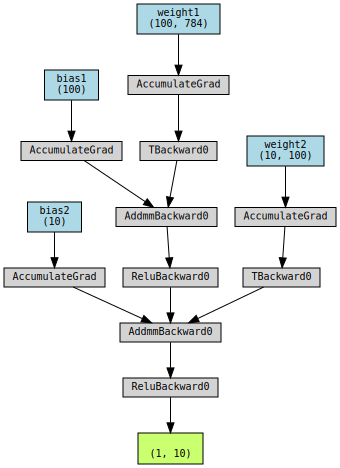

In [31]:
from torchviz import make_dot

example_input = torch.randn(784)

output = model(example_input)

make_dot(output, params=dict(model.named_parameters()))

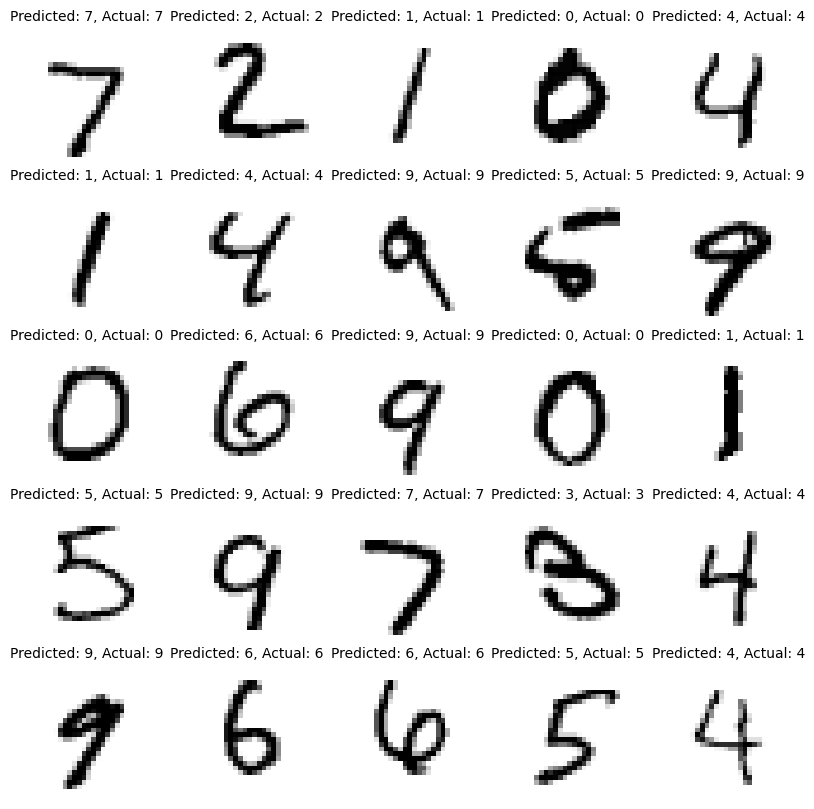

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Extract a batch of images and labels from the test dataset
images, labels = next(iter(test_loader))

# Make predictions on the batch of images
outputs = model(images)
predicted = torch.argmax(outputs, dim=1)

# Plot the images, predicted labels, and actual labels in a grid
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray_r')
    plt.axis('off')
    plt.title(f"Predicted: {predicted[i]}, Actual: {labels[i]}", fontsize=10)
plt.show()


---
# 실습 과제 6

## CPU와 GPU의 성능 비교

In [33]:
# CUDA를 사용할 수 있는지 여부 확인
if torch.cuda.is_available():
    print("현재 CUDA 장치:", torch.cuda.get_device_name(0))
else:
    print("현재 CPU 장치 사용 중")

현재 CUDA 장치: Tesla T4


In [34]:
%%timeit
import math

x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

torch.matmul(x,w)

285 ms ± 8.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---
# 실습 과제 7

## Logistic Regression Model

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# CIFAR-10 데이터셋 로드
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 이미지 정규화
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 로지스틱 회귀 모델 정의
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(3*32*32, 10)

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        out = self.linear(x)
        return out

model = LogisticRegression()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 학습
for epoch in range(20):  # 데이터셋을 여러번 반복해서 학습합니다.
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 0:
            running_loss = 0.0
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

100%|██████████| 170498071/170498071 [00:04<00:00, 42109070.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1 loss: 1.860
Epoch 2 loss: 1.765
Epoch 3 loss: 1.738
Epoch 4 loss: 1.720
Epoch 5 loss: 1.707
Epoch 6 loss: 1.697
Epoch 7 loss: 1.689
Epoch 8 loss: 1.683
Epoch 9 loss: 1.678
Epoch 10 loss: 1.674
Epoch 11 loss: 1.670
Epoch 12 loss: 1.666
Epoch 13 loss: 1.662
Epoch 14 loss: 1.660
Epoch 15 loss: 1.656
Epoch 16 loss: 1.654
Epoch 17 loss: 1.653
Epoch 18 loss: 1.651
Epoch 19 loss: 1.649
Epoch 20 loss: 1.646
Accuracy of the network on the 10000 test images: 39 %


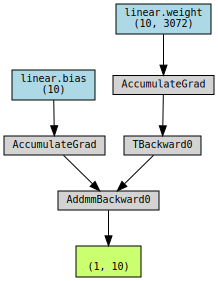

In [36]:
from torchviz import make_dot

example_input = torch.randn(1, 3, 32, 32)

output = model(example_input)

make_dot(output, params=dict(model.named_parameters()))


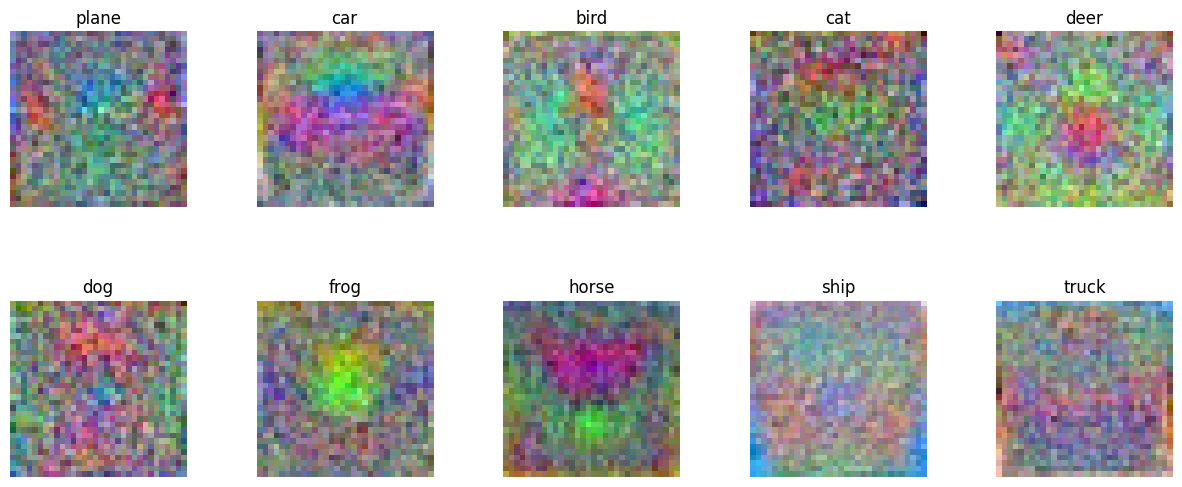

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 가중치 행렬 가져오기
weights = model.linear.weight.data.numpy()

# 클래스 별로 가중치 시각화
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2):
    for j in range(5):
        class_weight = weights[i * 5 + j]
        class_weight = class_weight.reshape(3, 32, 32)
        class_weight = class_weight - np.min(class_weight)
        class_weight = class_weight / np.max(class_weight)
        axs[i, j].imshow(np.transpose(class_weight, (1, 2, 0)))
        axs[i, j].set_title(classes[i * 5 + j])
        axs[i, j].axis('off')

plt.show()


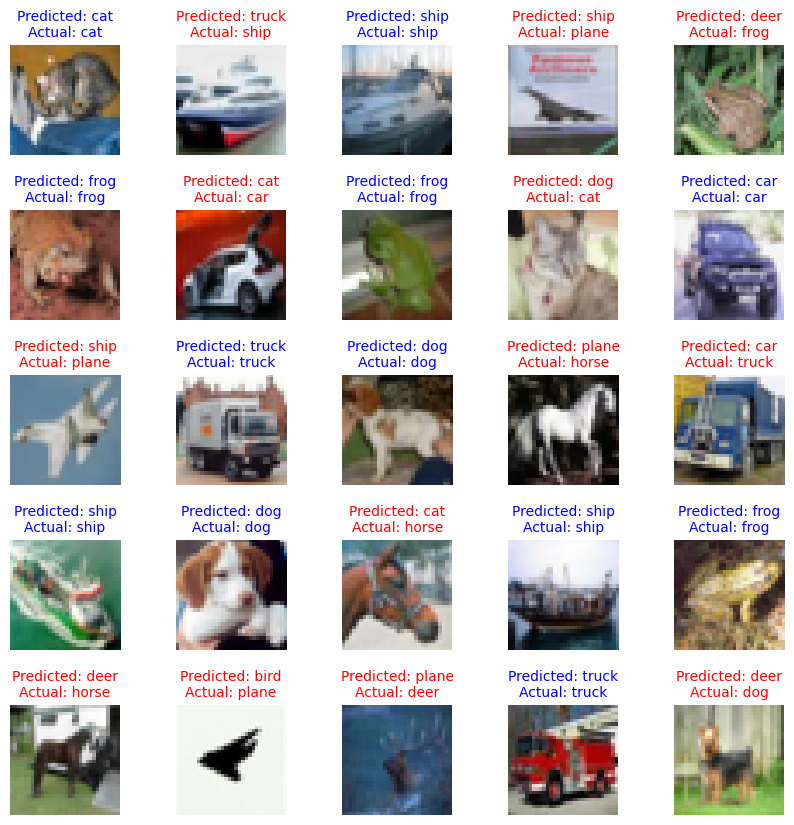

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 데이터셋 클래스의 레이블
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 테스트 데이터셋에서 이미지와 레이블을 무작위로 선택합니다.
images, labels = next(iter(test_loader))

# 모델로부터 예측을 얻어옵니다.
outputs = model(images.view(images.size(0), -1))
_, predicted = torch.max(outputs, 1)

# 이미지, 예측값, 실제값을 시각화합니다.
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 2 + 0.5  # 정규화 역변환
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # 이미지를 정상적인 형태로 변환하여 표시합니다.
    plt.axis('off')
    title_color = 'blue' if predicted[i] == labels[i] else 'red'
    plt.title(f"Predicted: {classes[predicted[i]]}\nActual: {classes[labels[i]]}", fontsize=10, color=title_color)
plt.show()


## ANN

In [39]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# CIFAR-10 데이터셋 로드와 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 다층 퍼셉트론(MLP) 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 120)  # 입력 이미지 차원: 3*32*32, 은닉층1 크기: 120
        self.fc2 = nn.Linear(120, 84)  # 은닉층1 크기: 120, 은닉층2 크기: 84
        self.fc3 = nn.Linear(84, 10)  # 은닉층2 크기: 84, 출력 클래스: 10

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # 이미지를 평탄화
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = MLP()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
for epoch in range(20):  # 데이터셋을 여러번 반복하여 훈련
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 0:
            running_loss = 0.0

    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

print('Finished Training')


# 테스트 데이터로 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Files already downloaded and verified
Files already downloaded and verified
Epoch 1 loss: 2.139
Epoch 2 loss: 1.874
Epoch 3 loss: 1.748
Epoch 4 loss: 1.673
Epoch 5 loss: 1.619
Epoch 6 loss: 1.577
Epoch 7 loss: 1.542
Epoch 8 loss: 1.511
Epoch 9 loss: 1.483
Epoch 10 loss: 1.456
Epoch 11 loss: 1.432
Epoch 12 loss: 1.407
Epoch 13 loss: 1.384
Epoch 14 loss: 1.362
Epoch 15 loss: 1.340
Epoch 16 loss: 1.320
Epoch 17 loss: 1.300
Epoch 18 loss: 1.281
Epoch 19 loss: 1.262
Epoch 20 loss: 1.245
Finished Training
Accuracy of the network on the 10000 test images: 51 %


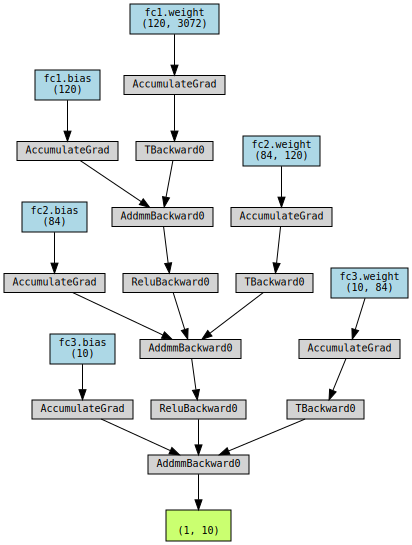

In [40]:
from torchviz import make_dot

example_input = torch.randn(1, 3, 32, 32)

output = model(example_input)

make_dot(output, params=dict(model.named_parameters()))


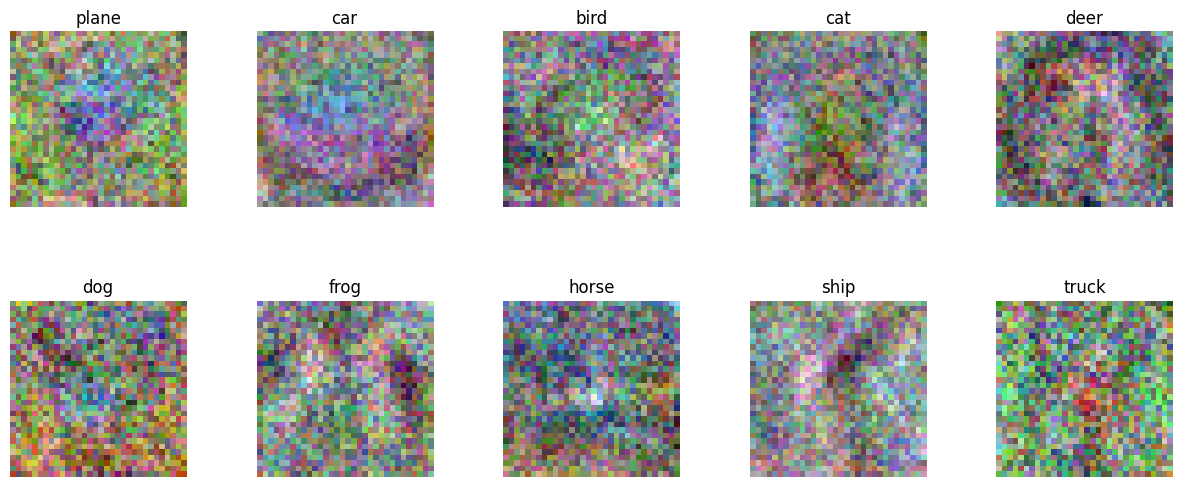

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 가중치 행렬 가져오기
weights = model.fc1.weight.data.numpy()

# 클래스 별로 가중치 시각화
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2):
    for j in range(5):
        class_weight = weights[i * 5 + j]
        class_weight = class_weight.reshape(3, 32, 32)
        class_weight = class_weight - np.min(class_weight)
        class_weight = class_weight / np.max(class_weight)
        axs[i, j].imshow(np.transpose(class_weight, (1, 2, 0)))
        axs[i, j].set_title(classes[i * 5 + j])
        axs[i, j].axis('off')

plt.show()


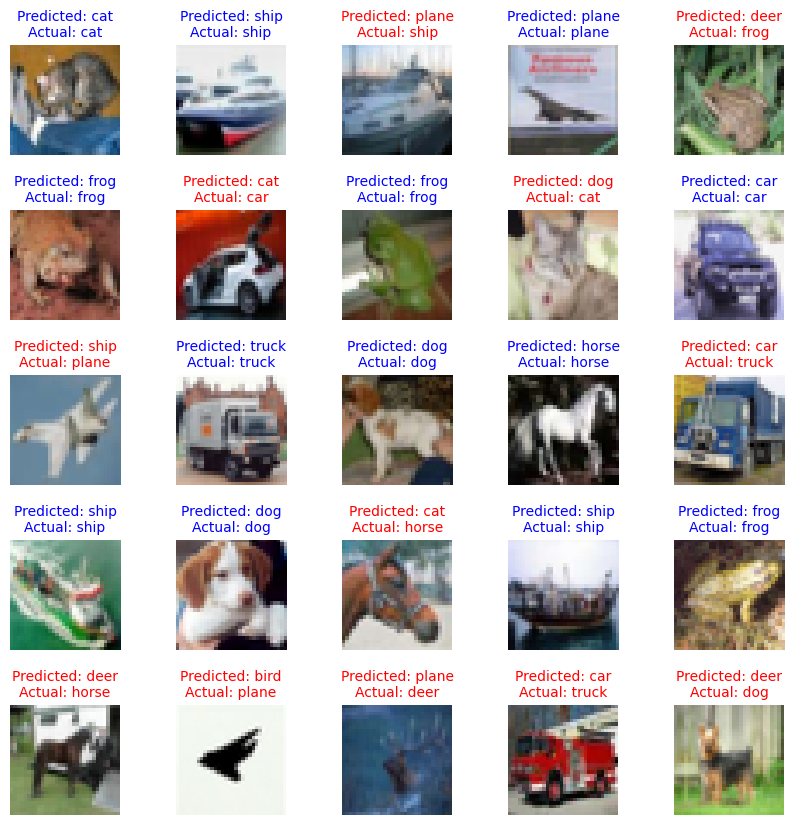

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 데이터셋 클래스의 레이블
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 테스트 데이터셋에서 이미지와 레이블을 무작위로 선택합니다.
images, labels = next(iter(testloader))

# 모델로부터 예측을 얻어옵니다.
outputs = model(images.view(images.size(0), -1))
_, predicted = torch.max(outputs, 1)

# 이미지, 예측값, 실제값을 시각화합니다.
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 2 + 0.5  # 정규화 역변환
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # 이미지를 정상적인 형태로 변환하여 표시합니다.
    plt.axis('off')
    title_color = 'blue' if predicted[i] == labels[i] else 'red'
    plt.title(f"Predicted: {classes[predicted[i]]}\nActual: {classes[labels[i]]}", fontsize=10, color=title_color)
plt.show()
